# End-to-End Machine Learning Pipeline Assignment using MySQL and Streamlit-

# Titanic

In [1]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Installing required libraries
!pip install pymysql

In [3]:
# Establishing a connection for MySQL
import pymysql
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

try:
    # Establish the connection
    conn = pymysql.connect(
        host = '127.0.0.1',
        user = 'root',
        password = 'Refolin@2293', # Give your own MySQL password here
        port = 3306
    )

    # Load data into DataFrame
    query = "SELECT * FROM titanic.Titanic"
    df = pd.read_sql(query, conn)

    # Display the results
    print('Connection successful. Here is your data :')
    display(df.head())

except pymysql.Error as e:
    print(f"MySQL Error : {e}")

finally:
    if 'conn' in locals():
        conn.close()
        print('Connection closed succesfully !!!')

Connection successful. Here is your data :


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S


Connection closed succesfully !!!


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S


In [5]:
#Importing all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [6]:
df.size

8568

In [7]:
#Checking the rows and columns
df.shape  

(714, 12)

In [8]:
#Checking for null values

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**There are no null values in the data.**

In [9]:
# Checking info for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    int64  
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        714 non-null    object 
 11  Embarked     714 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 67.1+ KB


**All columns are in expected data types**

In [10]:
#Checking for duplicaes
df.duplicated().sum()

0

**There are no duplicate values**

In [11]:
# Checking for unique values.
df['Survived'].unique()

array([0, 1], dtype=int64)

In [12]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [13]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5], dtype=int64)

In [14]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [15]:
df['Embarked'].unique()

array(['S', 'C', 'Q', ''], dtype=object)

# Statistics Summary

In [16]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.712885,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.529273,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.250000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


**Observations:**
* There is a significant discrepancy between the third quartile and the highest value for the Age column, indicating that this variable may have outliers to the right.

In [17]:
df.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,714,714,714,714,714
unique,714,2,542,135,4
top,"Braund, Mr. Owen Harris",male,347082,,S
freq,1,453,7,529,554


**Observations:**

* Highest number of passengers that is more than 50% had embarked from S-Southampton.
* Most of the passengers are Men.

# **Exploratory data Analysis**


# Univariate Analysis

<AxesSubplot:>

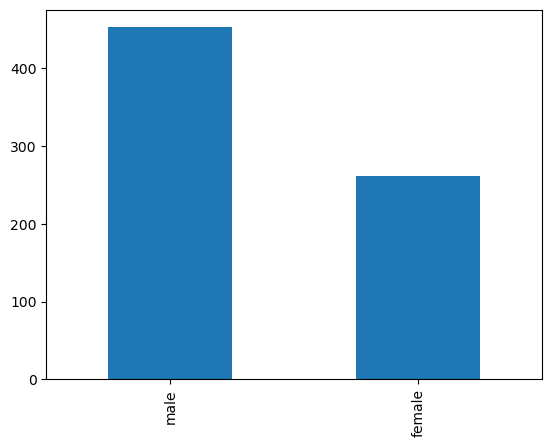

In [18]:
df['Sex'].value_counts().plot(kind='bar')

**Observation:**
* There are more male passengers compare to female passengers.

Text(0.5, 1.0, 'Distribution of Passenger Ages')

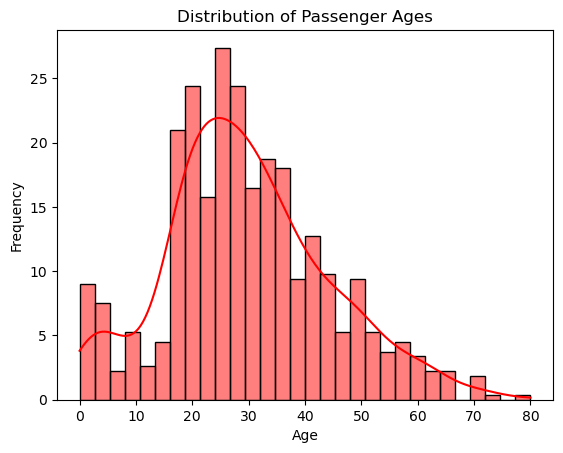

In [19]:
# Distribution of passenger age in the titanic
sns.histplot(df['Age'], stat='frequency', bins=30, kde=True, color='red',)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Ages')

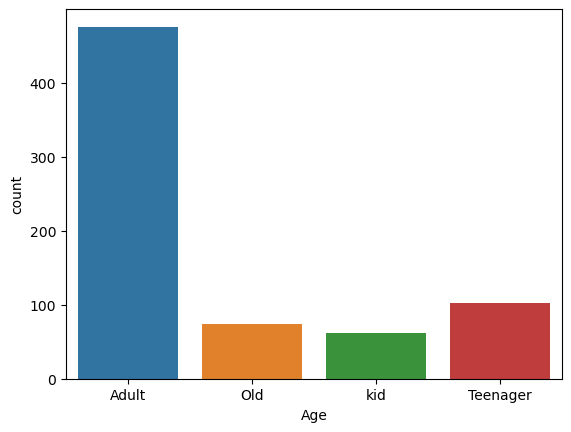

In [21]:
def age_group_func(age):  # Define a function to categorize age groups
    if age < 10:
        return 'kid'
    elif age < 20:
        return "Teenager"
    elif age < 50:
        return 'Adult'
    else:
        return 'Old'

Age_group = df['Age'].apply(age_group_func)  # Apply the function

sns.countplot(x=Age_group)
plt.show()  # Display the plot

In [23]:
Age_group.value_counts()

Adult       476
Teenager    102
Old          74
kid          62
Name: Age, dtype: int64

**Observations:**
* We can observe There are less passengers more than 50 years of age and less kids compare to Adults and teens.
* The above countplot shows the detailed age distribution of passengers.
* The data was rightly skewed because the old passengers are very less compare to adults.

<AxesSubplot:ylabel='Pclass'>

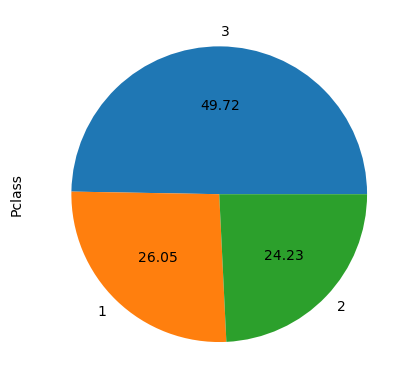

In [24]:
# pie chart for pclass

df['Pclass'].value_counts().plot(kind='pie',autopct='%.2f')

**Obervations:**

* The pie chart shows the distribution of Passenger class.
* It shows 55% of passengers are travelling in 3rd class.
* The lowest number of passengers are travelling in 2nd class,i.e, 20.65%.

<AxesSubplot:ylabel='Embarked'>

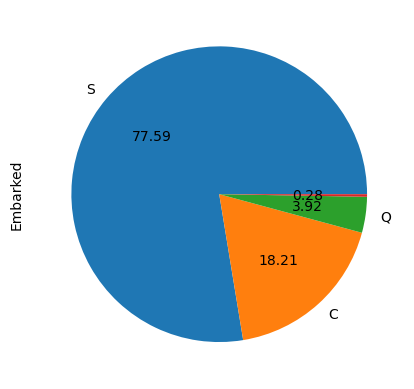

In [25]:
#Piechart for Embarked column

df['Embarked'].value_counts().plot(kind='pie',autopct='%.2f')

**Observation:**

* The above piechart for Embarked column shows that the highest number of passengers embarked from Southampton.
* The lowest number of passengers embarked from Queenstown

<AxesSubplot:ylabel='Survived'>

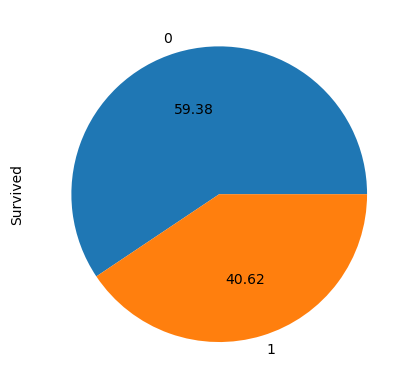

In [26]:
# Pie chart for Survival column
df['Survived'].value_counts().plot(kind='pie',autopct='%.2f')

**Observations:**

* The percentage of survivals is less compared to not survived.

# Bivariate Analysis

<AxesSubplot:xlabel='Sex', ylabel='count'>

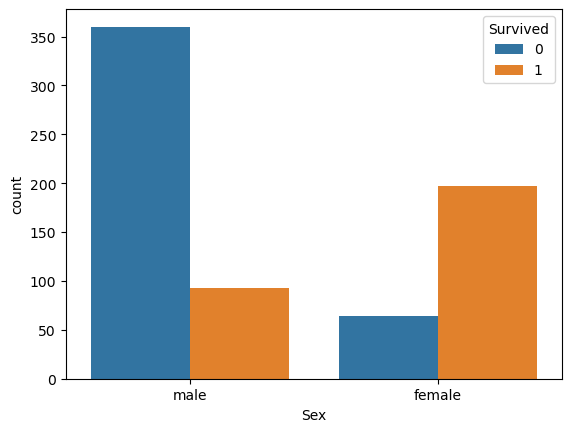

In [27]:
#Countplot for sex and survival

sns.countplot(data=df,x='Sex',hue='Survived')

**Observations:**

* The survival rate of females is significantly high compare to males.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

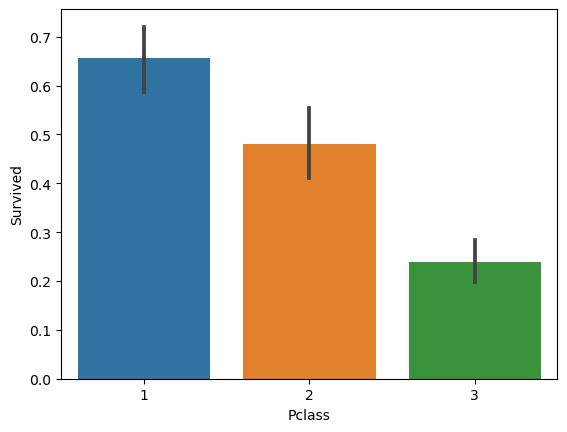

In [28]:
# Barplot for Passenger Class and Survival

sns.barplot(x='Pclass',y='Survived',data=df)

**Observations:**

* There is no significant difference between Pclass 1 and 2 survival rate.

In [29]:
# Grouping PClass and Survival rate

Class_survived=df.groupby('Pclass')['Survived'].value_counts()
Class_survived

Pclass  Survived
1       1           122
        0            64
2       0            90
        1            83
3       0           270
        1            85
Name: Survived, dtype: int64

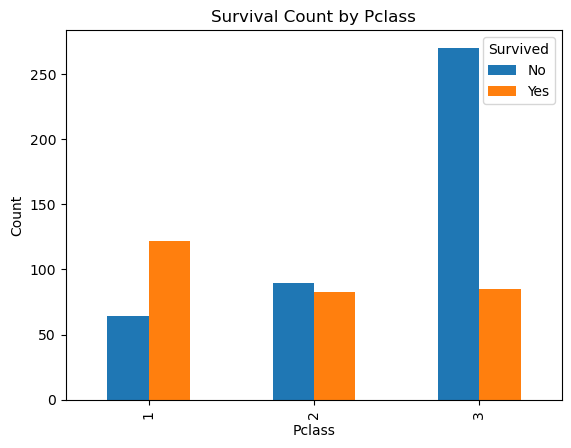

In [30]:
Class_survived.unstack().plot(kind='bar', stacked=False)
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Survival Count by Pclass')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

**Observation:**

* For passenger class 1 and 2 there is less difference between the passengers survived and not survived, whereas for class 3 passengers survived are significantly less compared to not survived.

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

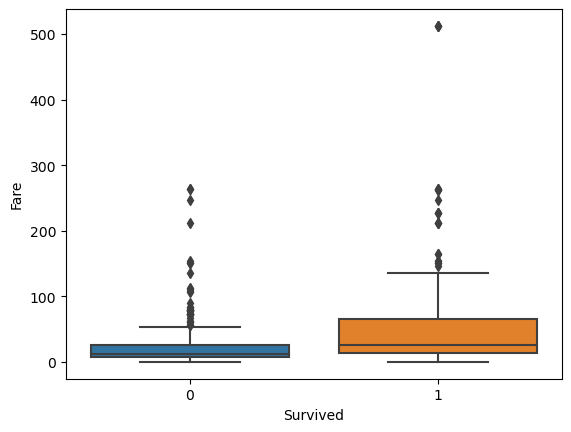

In [31]:
#  plot between fare and survival column to check relationship between fare and survival chance

sns.boxplot(x='Survived',y='Fare',data=df)

**Observation:**
 * The median fare for survived passengers is higher than not survived passengers.
 * The fare for not survived passengers is dense between 0-20, indicating most of the passengers who did not survive paid less fare.
 * There are outliers in fare for survived as well as not survived passengers, indicating few passengers paid high fare and not survived and viceversa.

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

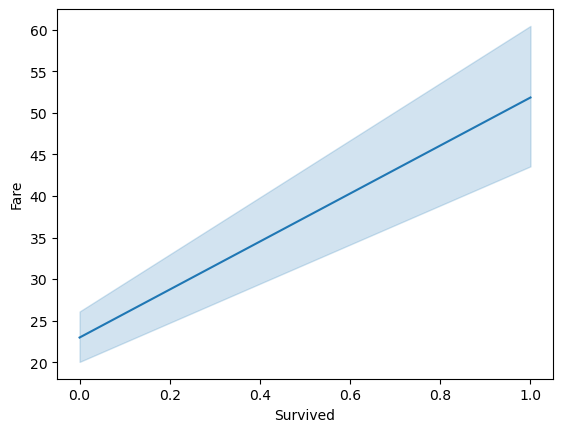

In [32]:
sns.lineplot(x='Survived',y='Fare',data=df)

**Observation:**
* The line plot indicates as the fare increases the chance of survival also increases.
* However, the above boxplot shows there are outliers.

In [33]:
#Grouping sibsp with Survival
sibsp_survived=df.groupby('SibSp')['Survived'].value_counts()

Text(0, 0.5, 'Count')

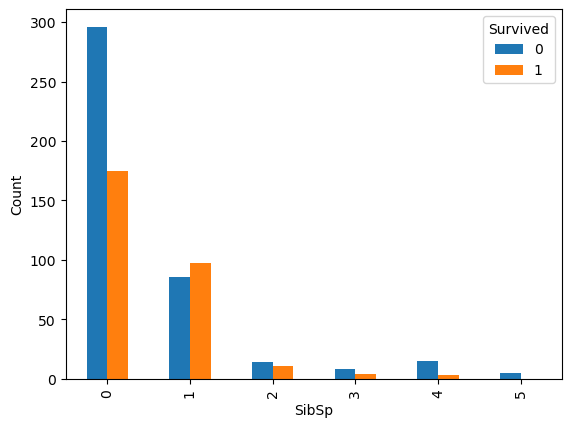

In [34]:
sibsp_survived.unstack().plot(kind='bar', stacked=False)
plt.xlabel('SibSp')
plt.ylabel('Count')

**Observations:**

 * Passengers with 0 sibsp have around 50% of survival rate.
 * Passengers with 1 SibSp have higher survival rate compare to other SibSp.
 * Passengers with 5 SibSp did not survive.
 * Passengers with more SibSp have very less survival rate.

In [35]:
Parch_survived=df.groupby('Parch')['Survived'].value_counts()

Text(0, 0.5, 'Count')

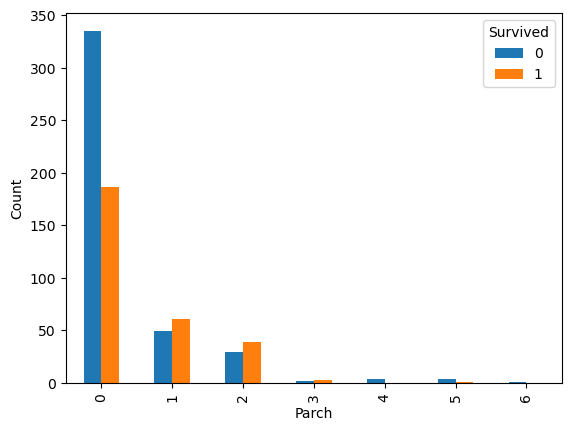

In [36]:
#Plotting Parch and Survival

Parch_survived.unstack().plot(kind='bar', stacked=False)
plt.xlabel('Parch')
plt.ylabel('Count')

**Observations:**

* The passengers with 0 parch have less survival rate.
* The passengers with 1, 2 parch have more survival rate.
* The passengers with 4 or more parch have very less survival rate.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

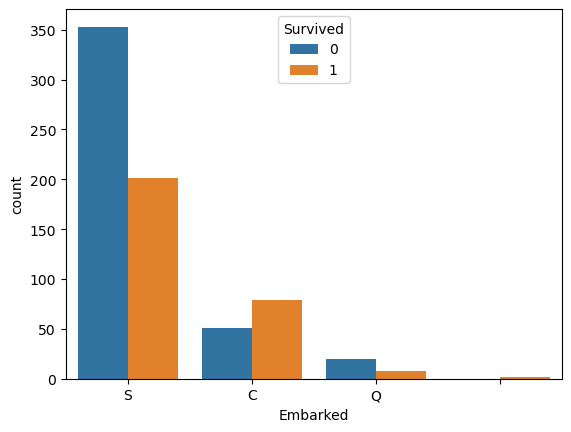

In [37]:
# Embarked vs Survival

sns.countplot(x='Embarked',hue='Survived',data=df)

**Observations:**

* The survival rate for passengers embarked from Cherbourg is high.
* The survival rate for passengers embarked from southampton is less
* Most of the passengers boarded from southampton port so the survival count and non-survival count is high.


# Multivatiate Analysis

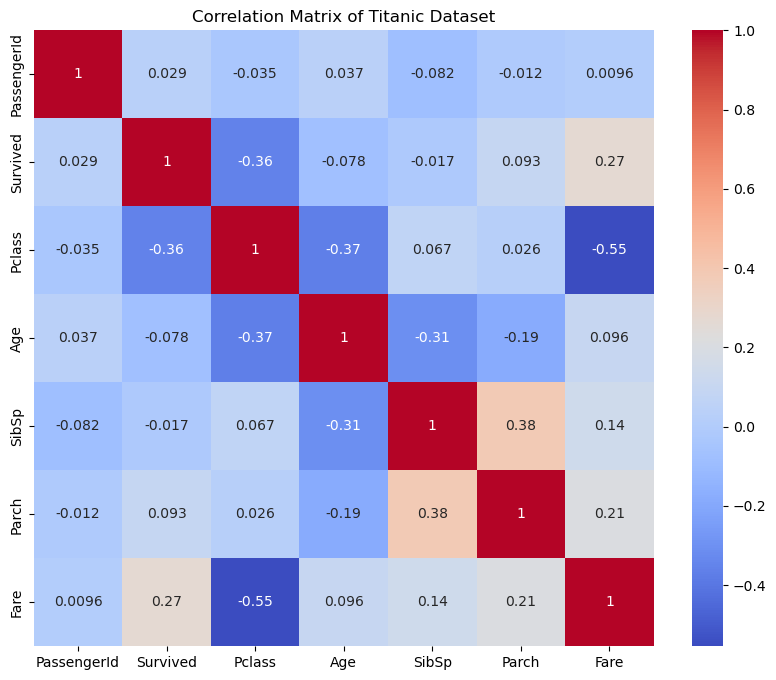

In [38]:
# Heatmap to show correlation between features
numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()

**Observations:**

- There's a positive correlation between Fare and Survived (0.26), suggesting that passengers who paid higher fares were more likely to survive.
- There's a negative correlation between Pclass and Survived (-0.34), indicating that passengers in lower classes (higher Pclass values) had lower survival rates.
- There's a negative correlation between Pclass and Fare (-0.55), showing that higher class passengers (lower Pclass values) generally paid higher fares.
- Parch and SibSp also show a positive correlation (0.41), indicating that passengers with more parents/children aboard were also more likely to have siblings/spouses aboard.

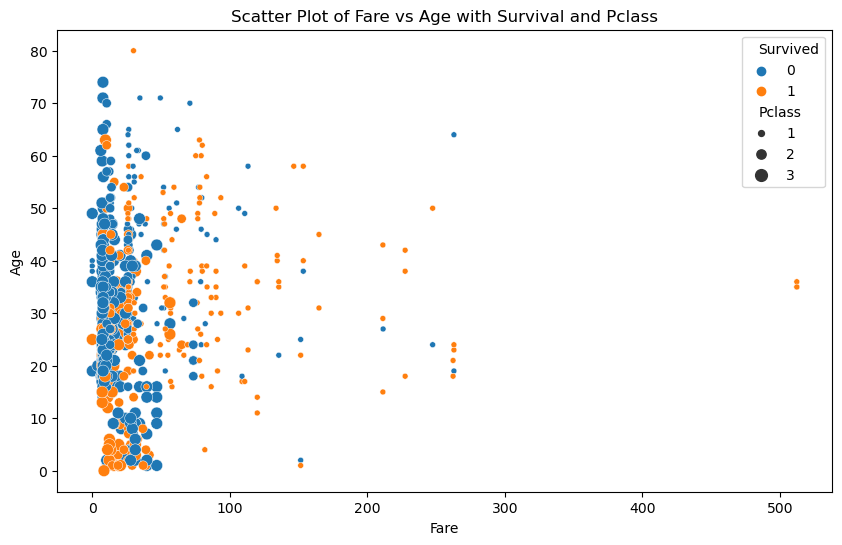

In [39]:
# Scatter plot with hue for survival and size for age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fare', y='Age', hue='Survived', size='Pclass', data=df)
plt.title('Scatter Plot of Fare vs Age with Survival and Pclass')
plt.show()

**Observations:**

* The scatter plot visualizes the relationship between Fare and Age, with the color indicating whether the passenger Survived (0 = No, 1 = Yes)
 and the size of the point representing the Pclass (1 = 1st, 2 = 2nd, 3 = 3rd).
* There is a noticeable difference in survival rates based on Fare. Passengers who paid higher fares generally had a better chance of survival.
* The size of the points reveals that passengers in higher classes (smaller Pclass values) tended to be older and pay higher fares.
* There are some outliers, such as younger passengers who paid high fares and did not survive, and older passengers who paid lower fares and survived.

# **Conclusions from EDA**

* The passengers aboard are more from age group 18-38 that is adults.
* The survival rate of females is significantly high compare to males.
* The passengers from higher class (lower pclass value) have higher chances of survival than lower class passengers.
* The passenger who have paid higher fare are more likely to travel in higher pclass(lower pclass vale).Hence, they have higher survival rate.
* Passengers with 1 sibap/parch on board have significantly more chances of survival.
* More number of passengers embarked are from southampton.
* Passengers embarked from cherburg have higher survival rate.

# Model Building

# preprocessing

In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S


**Columns such as passengerId, Name, Ticket and Cabin does not contribute in model building. So, lets drop them.**

In [41]:
df=df.drop(['PassengerId','Name','Ticket','Cabin'], axis =1)

In [42]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


In [43]:
# Label Encoding on Categorical Column
label_encoders = {}
for column in df.select_dtypes(include = ['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [44]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,3
1,1,1,0,38,1,0,71.2833,1
2,1,3,0,26,0,0,7.9250,3
3,1,1,0,35,1,0,53.1000,3
4,0,3,1,35,0,0,8.0500,3


In [45]:
# Getting input and output data
X = df.drop('Survived', axis = 1)
y = df['Survived']


**Performing Feature Scaling**

In [46]:
from sklearn.preprocessing import StandardScaler
scaling      = StandardScaler()
scaled_input = scaling.fit_transform(X)

scaled_input

array([[ 0.91123237,  0.75905134, -0.53122355, ..., -0.50589515,
        -0.51897787,  0.52161122],
       [-1.47636364, -1.31743394,  0.57077351, ..., -0.50589515,
         0.69189675, -2.01192899],
       [ 0.91123237, -1.31743394, -0.25572428, ..., -0.50589515,
        -0.50621356,  0.52161122],
       ...,
       [-1.47636364, -1.31743394, -0.737848  , ..., -0.50589515,
        -0.08877362,  0.52161122],
       [-1.47636364,  0.75905134, -0.25572428, ..., -0.50589515,
        -0.08877362, -2.01192899],
       [ 0.91123237,  0.75905134,  0.15752461, ..., -0.50589515,
        -0.50952283, -0.74515889]])

In [47]:
# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(scaled_input, y, test_size = 0.2, random_state = 45)

# Model building- Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

#Creating the Logistic Regression Model
model=LogisticRegression()

#Fitting the data
model.fit(X_train,y_train)

LogisticRegression()

In [52]:
#Taking the Predictions from the model
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

In [53]:
#model Evaluation
print("Training Accuracy:",metrics.accuracy_score(y_train,y_train_pred))
print("Testing Accuracy:",metrics.accuracy_score(y_test,y_test_pred))

Training Accuracy: 0.8073555166374781
Testing Accuracy: 0.7972027972027972


# Hyperparameter Tuning

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'l1_ratio': [0.1, 0.5, 0.9]  # Only used when penalty='elasticnet'
}

grid_search = GridSearchCV(LogisticRegression(random_state=5), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 0.001, 'l1_ratio': 0.1, 'penalty': None, 'solver': 'newton-cg'}


In [55]:
#Evaluate the best model on the test set 
y_pred = best_model.predict(X_test)
y_train_pred=best_model.predict(X_train)

In [56]:
#model Evaluation
print("Training Accuracy:",metrics.accuracy_score(y_train,y_train_pred))
print("Testing Accuracy:",metrics.accuracy_score(y_test,y_test_pred))

Training Accuracy: 0.8108581436077058
Testing Accuracy: 0.7972027972027972


# Model- Decision Tree

In [57]:
# Creating the DecisionTreeClassifier()
clf = DecisionTreeClassifier(random_state = 42)

# Fitting the data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [58]:
# Taking the predictions from the model
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [59]:
# Model Evaluation
print('Training Accuracy :', np.round(metrics.accuracy_score(y_train, y_train_pred), 3))
print('Training Precision :', np.round(metrics.precision_score(y_train, y_train_pred), 3))
print('Training Recall :', np.round(metrics.recall_score(y_train, y_train_pred), 3))
print('Training F1 Score :', np.round(metrics.f1_score(y_train, y_train_pred), 3))

print('\nTesting Accuracy :', np.round(metrics.accuracy_score(y_test, y_test_pred), 3))
print('Testing Precision :', np.round(metrics.precision_score(y_test, y_test_pred), 3))
print('Testing Recall :', np.round(metrics.recall_score(y_test, y_test_pred), 3))
print('Testing F1 Score :', np.round(metrics.f1_score(y_test, y_test_pred), 3))

Training Accuracy : 0.986
Training Precision : 1.0
Training Recall : 0.966
Training F1 Score : 0.983

Testing Accuracy : 0.804
Testing Precision : 0.764
Testing Recall : 0.737
Testing F1 Score : 0.75


**Observations:**
**Decision Tree Classifier Model is Overfitting**

In [60]:
# Creating the RandomForestClassifier()
rfc = RandomForestClassifier(random_state = 45)

# Fitting the data
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=45)

In [61]:
# Taking the predictions from the model
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

In [62]:
# Model Evaluation
print('Training Accuracy :', np.round(metrics.accuracy_score(y_train, y_train_pred), 3))
print('Training Precision :', np.round(metrics.precision_score(y_train, y_train_pred), 3))
print('Training Recall :', np.round(metrics.recall_score(y_train, y_train_pred), 3))
print('Training F1 Score :', np.round(metrics.f1_score(y_train, y_train_pred), 3))

print('\nTesting Accuracy :', np.round(metrics.accuracy_score(y_test, y_test_pred), 3))
print('Testing Precision :', np.round(metrics.precision_score(y_test, y_test_pred), 3))
print('Testing Recall :', np.round(metrics.recall_score(y_test, y_test_pred), 3))
print('Testing F1 Score :', np.round(metrics.f1_score(y_test, y_test_pred), 3))

Training Accuracy : 0.986
Training Precision : 0.979
Training Recall : 0.987
Training F1 Score : 0.983

Testing Accuracy : 0.811
Testing Precision : 0.768
Testing Recall : 0.754
Testing F1 Score : 0.761


# Hyperparameter Tuning using GridSearchCV for RandomForestClassifier 

In [63]:
# --- Hyperparameter Tuning using GridSearchCV for RandomForestClassifier ---
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

In [64]:
rfc= RandomForestClassifier(random_state=5)

grid_search = GridSearchCV(estimator=rfc,
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [65]:
# --- Evaluate the best model on the validation set ---
y_pred = best_model.predict(X_test)
y_train_pred=best_model.predict(X_train)

In [66]:
# Model Evaluation
print('Training Accuracy :', np.round(metrics.accuracy_score(y_train, y_train_pred), 3))
print('Training Precision :', np.round(metrics.precision_score(y_train, y_train_pred), 3))
print('Training Recall :', np.round(metrics.recall_score(y_train, y_train_pred), 3))
print('Training F1 Score :', np.round(metrics.f1_score(y_train, y_train_pred), 3))

print('\nTesting Accuracy :', np.round(metrics.accuracy_score(y_test, y_test_pred), 3))
print('Testing Precision :', np.round(metrics.precision_score(y_test, y_test_pred), 3))
print('Testing Recall :', np.round(metrics.recall_score(y_test, y_test_pred), 3))
print('Testing F1 Score :', np.round(metrics.f1_score(y_test, y_test_pred), 3))

Training Accuracy : 0.926
Training Precision : 0.961
Training Recall : 0.854
Training F1 Score : 0.905

Testing Accuracy : 0.811
Testing Precision : 0.768
Testing Recall : 0.754
Testing F1 Score : 0.761


# Hyperparameter tuning using- RandomizedSearchCV()

In [67]:
# RandomizedSearchCV()
from sklearn.model_selection import RandomizedSearchCV

# Creating a parameter dictionary
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [1, 2, 3, 4, 5],
    'min_samples_split' : [2, 3, 4, 5],
    'min_samples_leaf' : [1, 2, 3, 4, 5]
}

In [68]:
# Fitting the RandomizedSearchCV()
rfc = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator = rfc, param_distributions = params, cv = 5, verbose = 1)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5]},
                   verbose=1)

In [69]:
# Getting the best parameters
print(random_search.best_params_)

{'min_samples_split': 3, 'min_samples_leaf': 4, 'max_depth': 5, 'criterion': 'entropy'}


In [70]:
# Creating teh Optimal Model
rfc = RandomForestClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 1, min_samples_split = 4)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=4)

In [71]:
# Taking the predictions from the model
y_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)

In [72]:
# Model Evaluation
print('Training Accuracy :', np.round(metrics.accuracy_score(y_train, y_train_pred), 3))
print('Training Precision :', np.round(metrics.precision_score(y_train, y_train_pred), 3))
print('Training Recall :', np.round(metrics.recall_score(y_train, y_train_pred), 3))
print('Training F1 Score :', np.round(metrics.f1_score(y_train, y_train_pred), 3))

print('\nTesting Accuracy :', np.round(metrics.accuracy_score(y_test, y_test_pred), 3))
print('Testing Precision :', np.round(metrics.precision_score(y_test, y_test_pred), 3))
print('Testing Recall :', np.round(metrics.recall_score(y_test, y_test_pred), 3))
print('Testing F1 Score :', np.round(metrics.f1_score(y_test, y_test_pred), 3))

Training Accuracy : 0.855
Training Precision : 0.921
Training Recall : 0.704
Training F1 Score : 0.798

Testing Accuracy : 0.811
Testing Precision : 0.768
Testing Recall : 0.754
Testing F1 Score : 0.761


**Observations:**
 * All the metrics values except Precision are with in a range of 0.5, for training and testing data.
 * Performance of Random forest model is Good.
 * Save Random Forest model.
 
# Saving the model 
 

In [73]:
import pickle

In [74]:
# Save the model (RandomForestClassifier())
with open('RFC_titanic.pkl', 'wb') as file:
    pickle.dump(rfc, file)